In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from mpl_toolkits.mplot3d import Axes3D

### FROM SCRATCH

In [3]:
X = pd.read_csv('./Train-and-Test-Data/Linear_X_Train.csv')
Y = pd.read_csv('./Train-and-Test-Data/Linear_Y_Train.csv')

In [4]:
X = X.values
Y = Y.values


print(X.shape , Y.shape)

(3750, 1) (3750, 1)


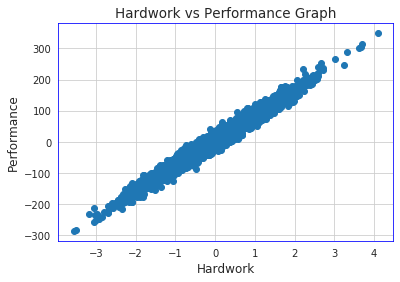

In [5]:
with sns.axes_style(style = 'whitegrid' , rc={'axes.edgecolor':'b'}):
    plt.scatter(X , Y)
plt.title("Hardwork vs Performance Graph" , size = 13.5)
plt.xlabel("Hardwork" , size = 12)
plt.ylabel("Performance" , size = 12)
plt.show()

In [8]:
def hypothesis(X , theta):
    y_= theta[0] + theta[1]*X
    return y_

def error(X , Y , theta):
    m=X.shape[0]
    total_error=0.0
    
    for i in range(m):
        y_= hypothesis(X[i] , theta)
        total_error += (y_ - Y[i])**2
        
    return (total_error/m)

def gradient(X , Y , theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        x=X[i]
        y=Y[i]
        
        y_= hypothesis(x , theta)
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

def gradient_Descent(X , Y , max_iterations = 100 , learning_rate = 0.1):
    theta = np.zeros((2,))
    theta_list=[]
    error_list=[]
    
    for i in range(max_iterations):
        
        grad = gradient(X , Y , theta)
        e  = error(X , Y , theta)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
        
    return theta , theta_list , error_list        

In [9]:
theta , theta_list , error_list = gradient_Descent(X , Y)

In [10]:
theta

array([ 3.72687896, 80.54086647])

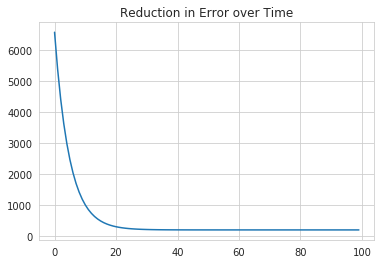

In [11]:
with sns.axes_style(style = 'whitegrid'):
    plt.plot(error_list)
plt.title("Reduction in Error over Time")
plt.show()

In [12]:
y_ = hypothesis(X , theta)
print(y_)

[[-19.57419108]
 [-43.69635897]
 [ 86.48322254]
 ...
 [-20.85126634]
 [138.69991375]
 [-35.87967507]]


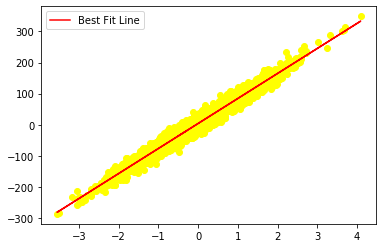

In [13]:
plt.scatter(X , Y , color = 'yellow')
plt.plot(X , y_ , color = 'r' , label = 'Best Fit Line')
plt.legend();

In [14]:
def r2_score(Y , y_):
    
    num = np.sum((Y - y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    
    return 1 - (num/denom)

In [15]:
print("Coefficient of Determination on Training data : R2-score is: " , (r2_score(Y , y_))*100)

Coefficient of Determination on Training data : R2-score is:  97.09612220841039


In [16]:
theta_list = np.array(theta_list)

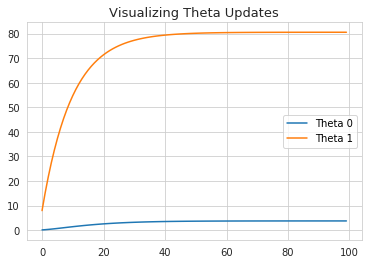

In [17]:
with sns.axes_style(style = 'whitegrid'):
    plt.plot(theta_list[: , 0] , label = 'Theta 0')
    plt.plot(theta_list[: , 1] , label = 'Theta 1')
plt.legend()
plt.title('Visualizing Theta Updates' , size = 13);

In [18]:
T0 = np.arange(-40, 40, 1)
T1 = np.arange(40, 120, 1)

T0 , T1 = np.meshgrid(T0 , T1)
print(T0.shape , T1.shape)

(80, 80) (80, 80)


In [19]:
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        
        y_ = T1[i , j]*X + T0[i, j]
        
        J[i , j] = np.sum((y_ - Y)**2)/Y.shape[0]

print(J.shape)

(80, 80)


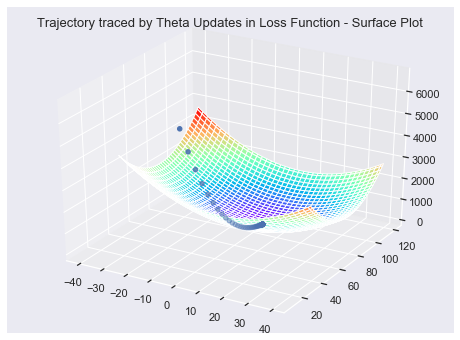

In [22]:
fig = plt.figure(figsize = (8, 6))
axes = fig.gca(projection = '3d')

axes.plot_surface(T0 , T1 , J , cmap = 'rainbow')
axes.scatter(theta_list[:, 0] , theta_list[:, 1], error_list)

plt.title("Trajectory traced by Theta Updates in Loss Function - Surface Plot" , size = 13);
plt.show()

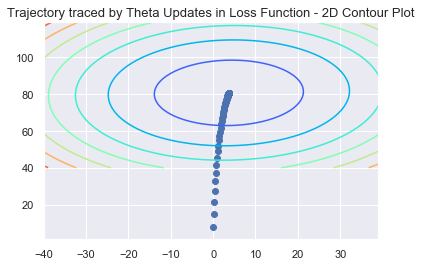

In [23]:
plt.contour(T0 , T1 , J, cmap ='rainbow')
plt.scatter(theta_list[:, 0] , theta_list[: , 1])
plt.title("Trajectory traced by Theta Updates in Loss Function - 2D Contour Plot" , size = 13);

In [24]:
x_test = pd.read_csv('./Train-and-Test-Data/Linear_X_Test.csv')
print(x_test.shape)

(1250, 1)


In [25]:
y_test = hypothesis(x_test.values , theta)
y_test

array([[-147.52439132],
       [ -66.26570453],
       [-200.05620583],
       ...,
       [  14.03673979],
       [ -18.66650943],
       [ -51.07517461]])

In [26]:
y_pred = pd.DataFrame(y_test , columns = ['y'])
print(y_pred.shape)
y_pred.head(3)

(1250, 1)


,y
0,-147.524391
1,-66.265705
2,-200.056206


In [27]:
y_pred.to_csv('y_predictions.csv' , index = False)

### USING SK-LEARN

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
x_train = X
y_train = Y

print(x_train.shape , y_train.shape)

(3750, 1) (3750, 1)


In [30]:
lr.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
print("Intercept is: " , lr.intercept_)
print("Slope is: " , lr.coef_)

Intercept is:  [3.72798828]
Slope is:  [[80.54363185]]


In [32]:
lr.score(x_train , y_train)

0.9709612233822353

In [33]:
y_pred_sk = lr.predict(x_test)
print(y_pred_sk.shape)

(1250, 1)


In [35]:
df = pd.DataFrame(y_pred_sk , columns = ['y'])
df.to_csv('y_predictions_sklearn.csv' , index = False)